# Xaxis - Digital Ad Campaing Analysis
The dataset contains results from a digital ad campaign which includes performance and audience data.

## Goal
1.	What interesting questions can you answer with the data?
2.	Trends over time, if any?
3.	What recommendations would you make moving forward?
4.	And, are there any KPIs that you would consider in the future?


In [0]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from pylab import rcParams

# Loading data
Dataset has 3 sheets; Data, Audience, and Legend . Data represent mostly numeric variables, which tell us more about campaign results.
The audience, in its turn, contains mostly customer demographics as `age group,` 'audience category,` 'household income,' 'gender.'

Legend describes the variables in both datasets.

Datasets have a different distribution of entries, so I'll analyze them separately. For KPI analysis, I'll use the `Data` dataset since it contains more data.

In [0]:
performance = pd.read_excel('campaing_results.xlsx', sheet_name='Data')
audience = pd.read_excel('campaing_results.xlsx', sheet_name = 'Audience')
legend = pd.read_excel('campaing_results.xlsx', sheet_name = 'Legend')

#EDA/VEDA
See the description of variables

In [0]:
legend

,Date of Conversion,Date when the conversion occurred
0,DMA,Region where the the conversion occurred
1,Product Name,Product purchased by the consumer
2,Impressions,Impressions served on a given day
3,Clicks,clicks occurred
4,# Conversions,Total number of conversions on a given day
5,Revenue,Revenue generated
6,Media_Spend,Media spend for impressions
7,Device,Device on which conversion occurred
8,Users,Users exposed to the campaign


# Audience

In [0]:
audience.head()

,Age Group,Gender,DMA,Audience Category,Products,HHI (in thousands of $$),# of children in HH,Users,Impressions,Clicks
0,18-24,M,Georgia,Shopcom_Sugars_Sweeteners_OverIndex_v1,A,60-75,1,350490.34,10369441,28466
1,25-34,M,Kentucky,UnitedHealth_Manufacturing_Engineers_v2,B,75-90,2,282626.66,10299742,23796
2,35-44,F,Mississippi,Shopcom_Sleeping_Snoring_Aids_OverIndex_v1,C,91-105,3,287037.70,11497383,23757
3,45-54,M,Alabama,LAL_Cust_of_Uniforms_v3,D,106-120,>3,361805.14,10769394,27410
4,55-64,F,Wyoming,Revlon_Almay_Healthy_Glow_2017,E,120-135,2,414014.52,10937342,29716


In [0]:
audience.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 10 columns):
Age Group                   60 non-null object
Gender                      60 non-null object
DMA                         60 non-null object
Audience Category           60 non-null object
Products                    60 non-null object
HHI (in thousands of $$)    60 non-null object
# of children in HH         60 non-null object
Users                       60 non-null float64
Impressions                 60 non-null int64
Clicks                      60 non-null int64
dtypes: float64(1), int64(2), object(7)
memory usage: 4.8+ KB


In [0]:
audience.describe()

,Users,Impressions,Clicks
count,60.000000,6.000000e+01,60.000000
mean,494843.097167,1.359223e+07,36637.683333
std,108656.710056,2.400995e+06,7779.975281
min,282626.660000,1.029974e+07,23757.000000
25%,442460.825000,1.149738e+07,29754.250000
50%,472553.910000,1.336343e+07,37686.000000
75%,581710.930000,1.518889e+07,41062.500000
max,703021.880000,1.921582e+07,52294.000000


**observation:** The dataset contains 60 entries and 10 variablesWe don't have missing values There are only 3 numerical variables: `Users,` `Impressions,` `Clicks` 

## Gender distribution

F    31
M    29
Name: Gender, dtype: int64


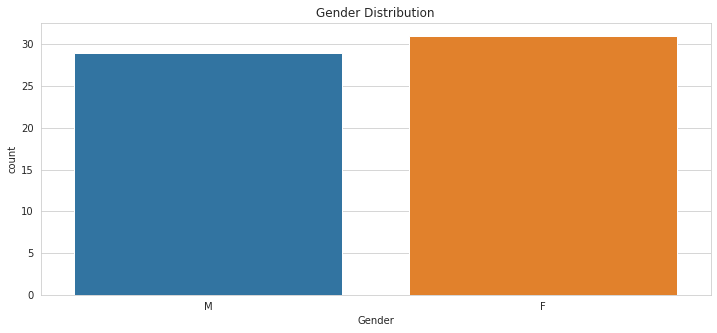

In [0]:
# plot gender distribution
gender = audience['Gender']
sns.set_style('whitegrid')

rcParams['figure.figsize'] = 12, 5
print(gender.value_counts())
_ = sns.countplot(gender)
plt.title('Gender Distribution')
plt.show()

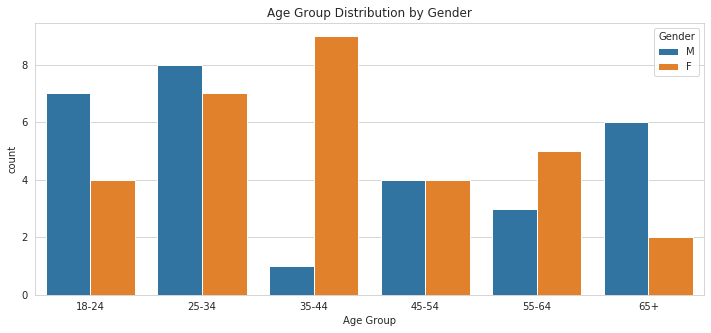

In [0]:
# gender by age group
age_group = audience['Age Group']
_ = sns.countplot(x = age_group, hue = gender)
plt.title('Age Group Distribution by Gender')
plt.show()

**Observation:** Gender distribution is almost normal. From gender, by age group graph we can say that only in two age groups female customers are more active than male customers (age groups: **35-44** and **55-64**)

## Age Group Distribution

25-34    15
18-24    11
35-44    10
65+       8
55-64     8
45-54     8
Name: Age Group, dtype: int64


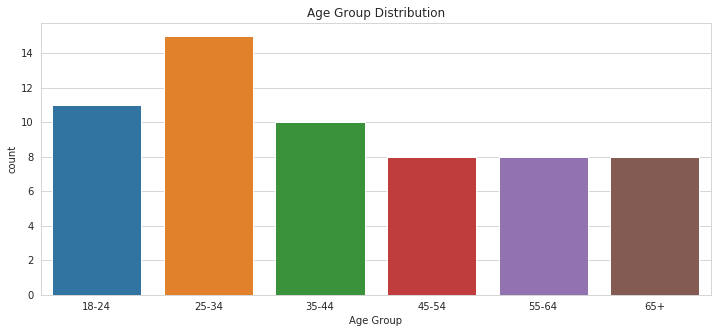

In [0]:
print(age_group.value_counts())
_ = sns.countplot(age_group)
plt.title('Age Group Distribution')
plt.show()

**Observation:** Most of the traffic comes from visitors whos age is within 18-44 years.

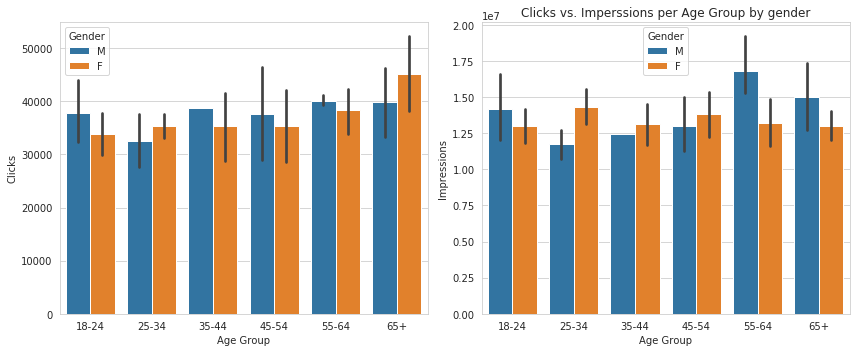

In [0]:
clicks = audience['Clicks']

# age group by clicks
f, axes = plt.subplots(1, 2)
_ = sns.barplot(x = age_group, y = clicks, hue = gender, ax = axes[0])

# age group by imperssions
impressions = audience['Impressions']
_ = sns.barplot(age_group, impressions, hue = gender, ax = axes[1])

plt.title('Clicks vs. Imperssions per Age Group by gender')
plt.tight_layout()
plt.show()

**Observation:** We'll later do KPI analysis, but from the charts above depicted, we roughly see that CTR for male customers in 35-44 and 45-54 age groups is higher compared to female customers. The same we can say for 65+ female customers. 

## Audience Category


In [0]:
a_category = audience['Audience Category']
print(a_category.unique())

['Shopcom_Sugars_Sweeteners_OverIndex_v1'
 'UnitedHealth_Manufacturing_Engineers_v2'
 'Shopcom_Sleeping_Snoring_Aids_OverIndex_v1' 'LAL_Cust_of_Uniforms_v3'
 'Revlon_Almay_Healthy_Glow_2017'
 'Shopcom_First_Aid_Emergency_Supplies_OverIndex_v1'
 'LAL_Cust_of_First_Aid_v3' 'Carbonated_Beverages_Fanta'
 'Carbonated_Beverages_Sierra_Mist'
 'Juices_Non_Carbonated_Beverages_Turkey_Hill'
 'Carbonated_Beverages_Dr_Pepper'
 'MarkAnthonyBrands_WhiteClaw_CompettiveANDAffinity'
 'Carbonated_Beverages_Sprite'
 'Juices_Non_Carbonated_Beverages_Country_Time'
 'Travel_InMarket_Travel_to_Australia_and_Pacific_1_v1'
 'Chi_Council_Government_v1'
 'Shopcom_Stuffing_Mixes_Bread_Crumbs_OverIndex_v1' 'Hair_Care_Neutrogena'
 'Carbonated_Beverages_Seven_Up' 'IBM_Researchers_LAL'
 'AudienceDiscovery_Age_50_54_DO_NOT_USE' 'Bath_Care_Caress'
 'Shopcom_Jams_Jellies_OverIndex_v1' 'LAL_Cust_of_Fire_v3' 'Business_low'
 'Shopcom_Non_Chocolate_OverIndex_v1'
 'Shopcom_All_Other_Pickles_Olives_Relish_OverIndex_v1'
 'Skin

**Observation:** We have several categories for `Household Cleaners,` `Skin Care,` and `Carbonated Beverages` separated by brand or product. So for better interpretation, let's remove brand names and keep just audience category. 

In [0]:
audience.loc[audience['Audience Category'].str.contains('Carbonated', case = False), 'Audience Category'] = 'Carbonated Beverages'
audience.loc[audience['Audience Category'].str.contains('Skin', case = False), 'Audience Category'] = 'Skin Care'
audience.loc[audience['Audience Category'].str.contains('Household', case = False), 'Audience Category'] = 'Household Cleaners'
audience.loc[audience['Audience Category'].str.contains('Travel', case = False), 'Audience Category'] = 'Travel'

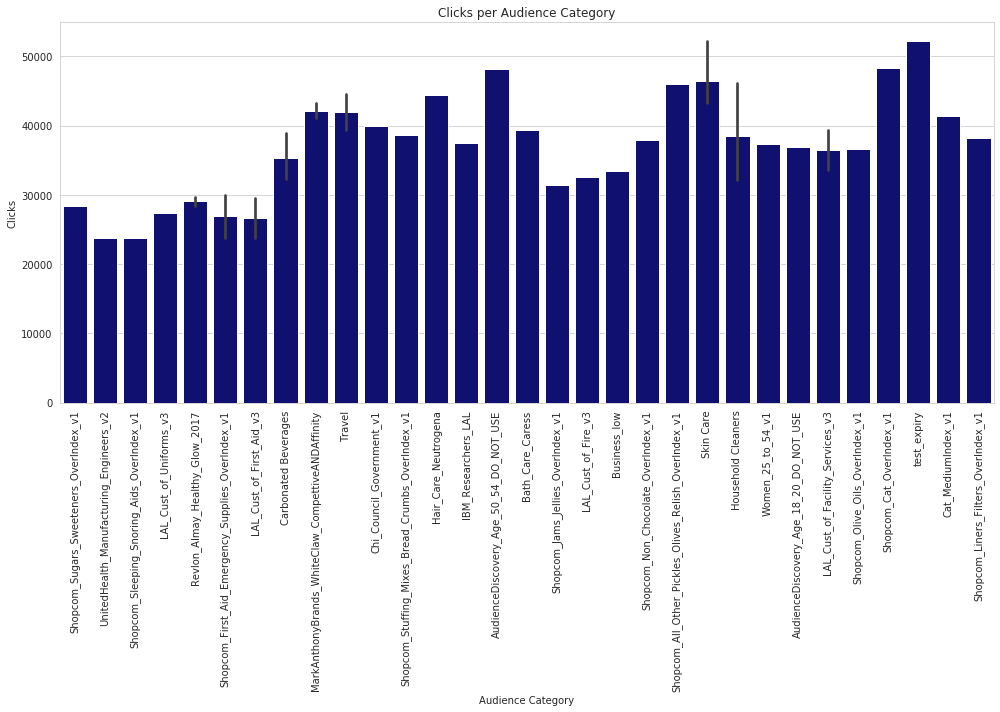

In [0]:
rcParams['figure.figsize'] = 14, 10

_  = sns.barplot(a_category, clicks, color = 'navy')
loc, labels = plt.xticks()
_.set_xticklabels(labels, rotation=90)

plt.title('Clicks per Audience Category')
plt.tight_layout()
plt.show()

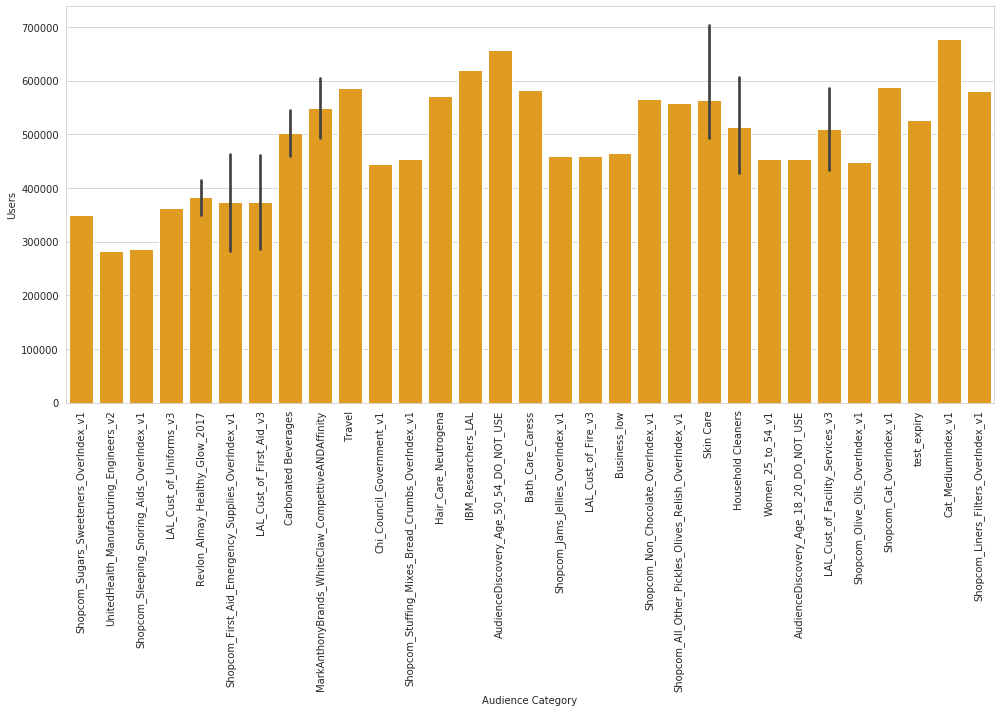

In [0]:
traffic = audience['Users']
_ = sns.barplot(a_category, traffic, color = 'orange')
loc, labels = plt.xticks()
_.set_xticklabels(labels, rotation=90)

plt.tight_layout()
plt.show()

# Performance
The performance data we'll analyze in 3 steps: overall performance indicators by DMA, overall performance indicator by product, and overall performance over the years.

In [0]:
performance.head()

,Date of Conversion,DMA,ProductName,Users,Impressions,Clicks,# Conversions,Revenue,Media_Spend,Device
0,2016-01-01,Georgia,A,205989.21,1200916.0,15126,2,141.93,3456.190020,Mobile
1,2016-01-02,Kentucky,B,268739.66,885313.0,15254,4,686.95,4158.543690,Desktop
2,2016-01-03,Mississippi,C,296737.05,1138476.0,18666,5,428.60,3706.326005,Tablet
3,2016-01-04,Alabama,D,342409.92,1135033.0,19688,7,144.03,3686.892393,Desktop
4,2016-01-05,Wyoming,E,319611.48,993545.0,20886,1,145.59,3644.233662,Mobile


In [0]:
performance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1343 entries, 0 to 1342
Data columns (total 10 columns):
Date of Conversion    1343 non-null datetime64[ns]
DMA                   1343 non-null object
ProductName           1343 non-null object
Users                 1343 non-null float64
Impressions           1343 non-null float64
Clicks                1343 non-null int64
# Conversions         1343 non-null int64
Revenue               1119 non-null float64
Media_Spend           1254 non-null float64
Device                1343 non-null object
dtypes: datetime64[ns](1), float64(4), int64(2), object(3)
memory usage: 105.0+ KB


In [0]:
# checking for missing data
performance.isnull().sum()

Date of Conversion      0
DMA                     0
ProductName             0
Users                   0
Impressions             0
Clicks                  0
# Conversions           0
Revenue               224
Media_Spend            89
Device                  0
dtype: int64

In [0]:
performance.describe()

,Users,Impressions,Clicks,# Conversions,Revenue,Media_Spend
count,1.343000e+03,1.343000e+03,1343.000000,1343.000000,1119.000000,1254.000000
mean,4.463727e+05,8.942820e+06,33995.641847,4.077439,399.921957,8981.657285
std,1.705461e+05,4.303117e+06,11982.881087,2.602868,3031.664974,5075.839910
min,-9.999980e+03,-2.199996e+05,0.000000,0.000000,-404.610000,-23427.796852
25%,3.406582e+05,6.223091e+06,26920.000000,2.000000,142.840000,6374.502385
50%,4.246746e+05,8.652865e+06,32982.000000,4.000000,144.830000,8151.846708
75%,5.354862e+05,1.120200e+07,41148.000000,7.000000,147.190000,10935.987428
max,1.404163e+06,3.153001e+07,70308.000000,9.000000,50020.710000,24713.949914


## Data Preparation & Cleaning

In [0]:
# filling missing values with mean
# performance['Revenue'].fillna(np.mean(performance['Revenue']), inplace = True)
# performance['Media_Spend'].fillna(np.mean(performance['Media_Spend']), inplace = True)

performance = performance.fillna(performance.median())
performance.describe()

,Users,Impressions,Clicks,# Conversions,Revenue,Media_Spend
count,1.343000e+03,1.343000e+03,1343.000000,1343.000000,1343.000000,1343.000000
mean,4.463727e+05,8.942820e+06,33995.641847,4.077439,357.374974,8926.666115
std,1.705461e+05,4.303117e+06,11982.881087,2.602868,2768.741123,4908.985632
min,-9.999980e+03,-2.199996e+05,0.000000,0.000000,-404.610000,-23427.796852
25%,3.406582e+05,6.223091e+06,26920.000000,2.000000,142.980000,6472.752132
50%,4.246746e+05,8.652865e+06,32982.000000,4.000000,144.830000,8151.846708
75%,5.354862e+05,1.120200e+07,41148.000000,7.000000,146.340000,10813.375321
max,1.404163e+06,3.153001e+07,70308.000000,9.000000,50020.710000,24713.949914


In [0]:
# check dataset for all zero entries
np.sum(performance == 0)

Date of Conversion     0
DMA                    0
ProductName            0
Users                  0
Impressions            0
Clicks                28
# Conversions         61
Revenue               24
Media_Spend            0
Device                 0
dtype: int64

In [0]:
# remove all zero entries
performance = performance.loc[(performance!=0).all(1)]

# double check
np.sum(performance == 0)

Date of Conversion    0
DMA                   0
ProductName           0
Users                 0
Impressions           0
Clicks                0
# Conversions         0
Revenue               0
Media_Spend           0
Device                0
dtype: int64

In [0]:
# anomaly detection
print(np.sum(performance['Users'] < 0))
print(np.sum(performance['Media_Spend'] < 0))

# removing anomalies
performance.drop(performance[performance['Users'] <0].index , inplace=True)
performance['Media_Spend'] = performance['Media_Spend'].abs()

5
22


In [0]:
print(np.sum(performance['Media_Spend'] < 0))

0


**Take away:** If we look at `Revenue` and `Media Spend` features before and after imputation, we can notice changes in the variance of 50th and 75th  percentiles. This is because we filled missing values with the mean of the corresponding variable. Since it can affect the results of the analysis, I changed the imputation from mean value to the median value. It has a smaller standard deviation than data the distribution of data with mean value imputation.

With removing zero value entries we avoid a zero-devision and -infinity in our statistics.

Before checking numeric variables distributions by discrete features, I would like to see the correlation between Clicks and Impressions

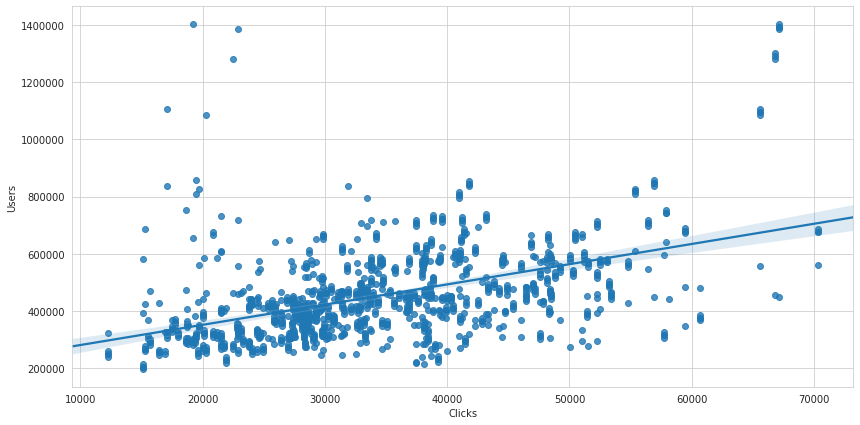

In [0]:
p_clicks = performance['Clicks']
p_impressions = performance['Impressions']
p_traffic = performance['Users']
revenue = performance['Revenue']
media_spend = performance['Media_Spend']
states = performance['DMA']

# correlation between clicks and impressions
rcParams['figure.figsize'] = 14,7
_ = sns.regplot(p_clicks, p_traffic)
plt.show()

**Observation:** There's some linearity between Traffic and clicks. Obviously, the more traffic, the more chances to get clicks.

## DMA Distribution

51


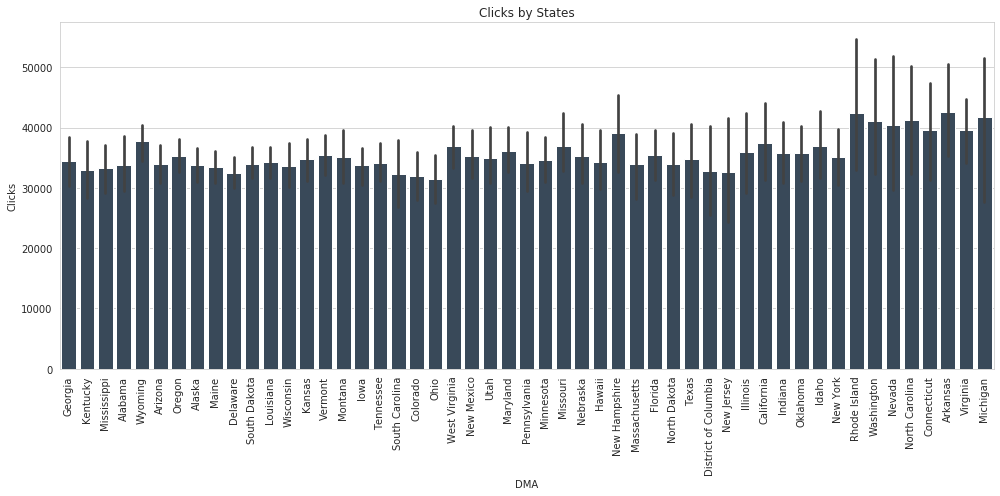

In [0]:
#@title
print(states.nunique())
rcParams['figure.figsize'] = 14, 7
# clicks distribution by states
_ = sns.barplot(states, p_clicks, color = '#34495e')
loc, labels = plt.xticks()
_.set_xticklabels(labels, rotation=90)

plt.title('Clicks by States')
plt.tight_layout()
plt.show()

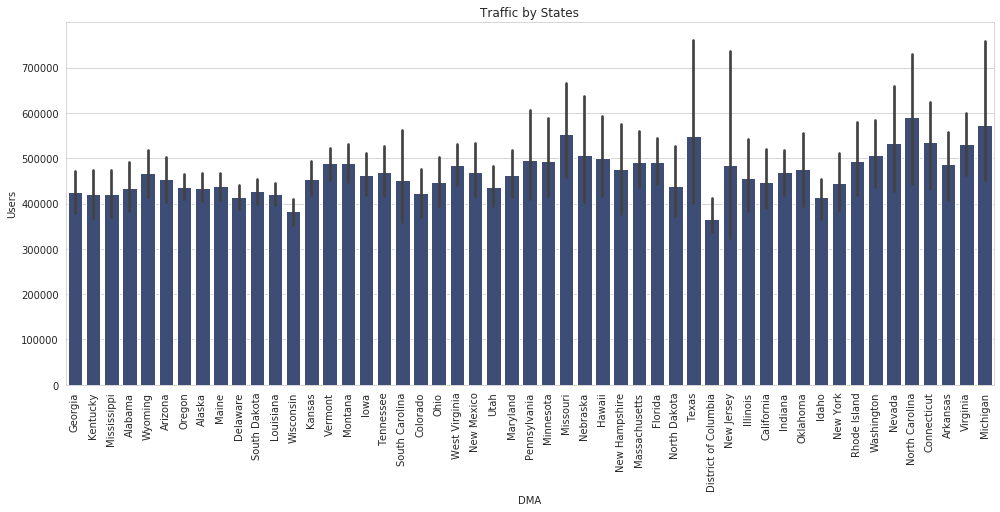

In [0]:
#@title
# traffic distribution by states
_ = sns.barplot(states, p_traffic, color = '#34497e')
loc, labels = plt.xticks()
_.set_xticklabels(labels, rotation=90)
plt.tight_layout()
plt.title('Traffic by States')
plt.show()

**Observation:** More clicks come from Washington, and the more visitors come from Noth Carolina compared to other states. 

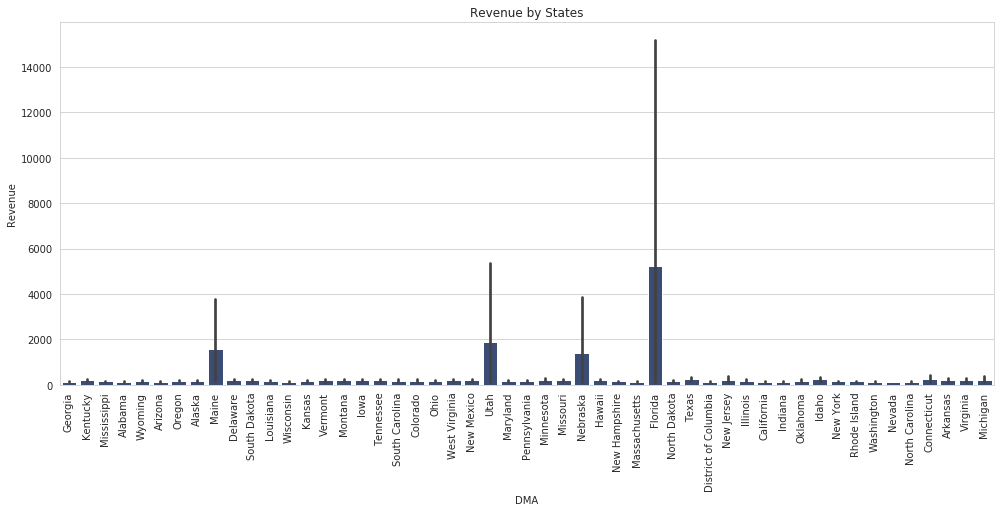

In [0]:
#@title
_ = sns.barplot(states, revenue, color = '#32497e')
loc, labels = plt.xticks()
_.set_xticklabels(labels, rotation=90)
plt.tight_layout()
plt.title('Revenue by States')
plt.show()

**Observation:** Only 4 states generates better revenue.

## Product Distribution

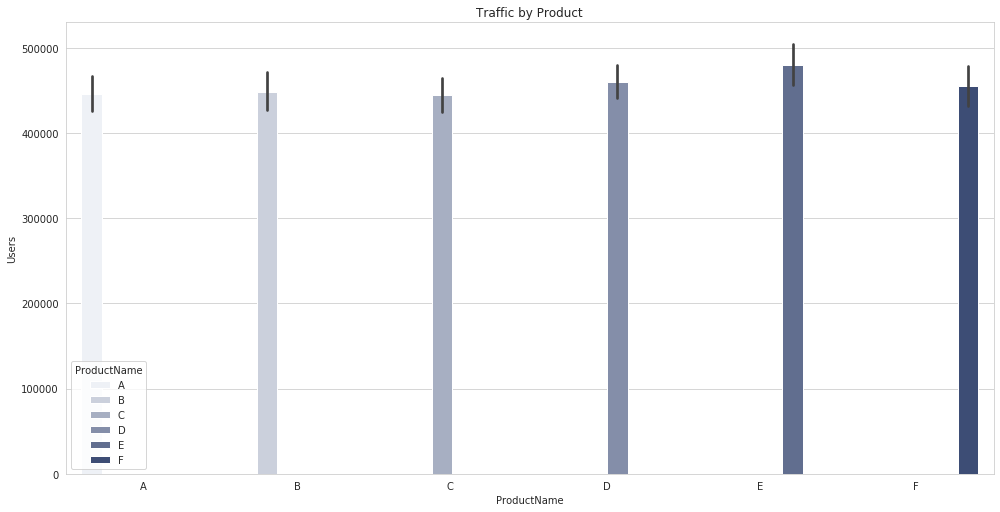

In [0]:
#@title
product = performance['ProductName']

# traffic distribution by product
_ = sns.barplot(product, p_traffic, color = '#34497e', hue = product)
loc, labels = plt.xticks()

plt.tight_layout()
plt.title('Traffic by Product')
plt.show()

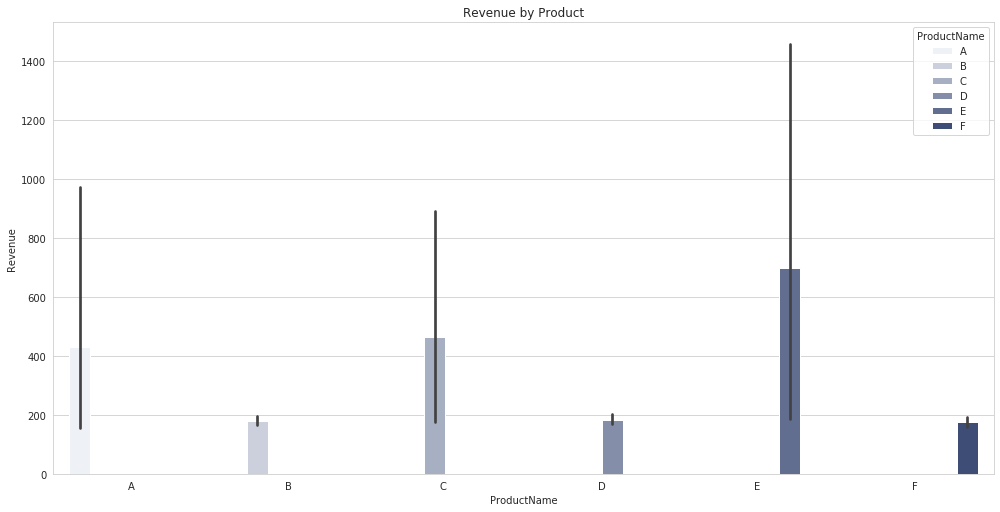

In [0]:
#@title
# revenue distribution by product
_ = sns.barplot(product, revenue, color = '#34497e', hue = product)
loc, labels = plt.xticks()

plt.tight_layout()
plt.title('Revenue by Product')
plt.show()

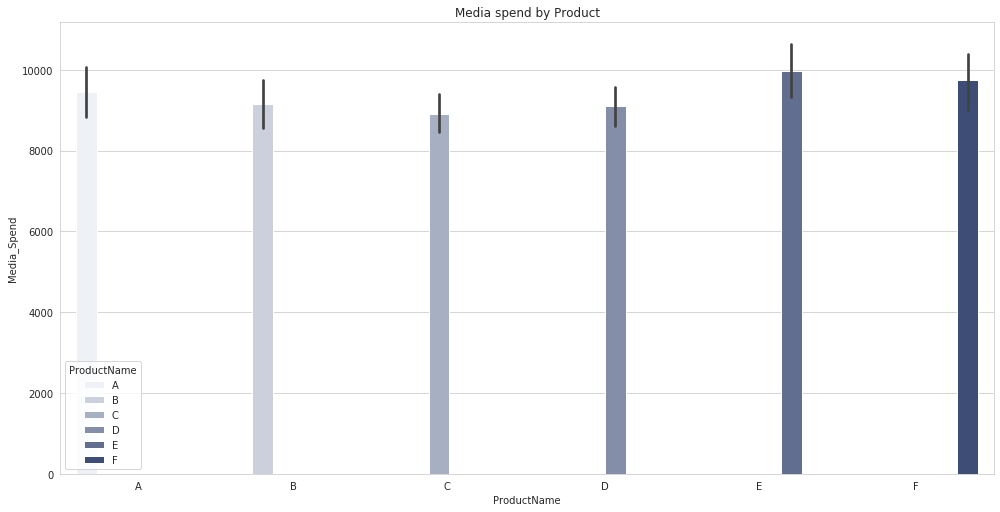

In [0]:
#@title
# media spend distribution by product
_ = sns.barplot(product, media_spend, color = '#34497e', hue  = product)
loc, labels = plt.xticks()

plt.tight_layout()
plt.title('Media spend by Product')
plt.show()

**Observation:** At first glance, we can observe a higher positive correlation between `media spend` of products A, C, and E with their corresponding `revenue.`

## Time Series Analysis
We can analyze different performance indicators over time, however, I would focus mostly on Clicks as it's our Lead.

In [0]:
ts = performance.copy()
ts['datetime'] = pd.to_datetime(ts['Date of Conversion'])
ts = ts.set_index('datetime')
ts.drop(['Date of Conversion'], axis=1, inplace=True)

# new columns based on datetime
ts['Year'] = ts.index.year
ts['Month'] = ts.index.month
ts['Weekday Name'] = ts.index.weekday_name
ts.head()

,DMA,ProductName,Users,Impressions,Clicks,# Conversions,Revenue,Media_Spend,Device,Year,Month,Weekday Name
datetime,,,,,,,,,,,,
2016-01-01,Georgia,A,205989.21,1200916.0,15126,2,141.93,3456.190020,Mobile,2016,1,Friday
2016-01-02,Kentucky,B,268739.66,885313.0,15254,4,686.95,4158.543690,Desktop,2016,1,Saturday
2016-01-03,Mississippi,C,296737.05,1138476.0,18666,5,428.60,3706.326005,Tablet,2016,1,Sunday
2016-01-04,Alabama,D,342409.92,1135033.0,19688,7,144.03,3686.892393,Desktop,2016,1,Monday
2016-01-05,Wyoming,E,319611.48,993545.0,20886,1,145.59,3644.233662,Mobile,2016,1,Tuesday


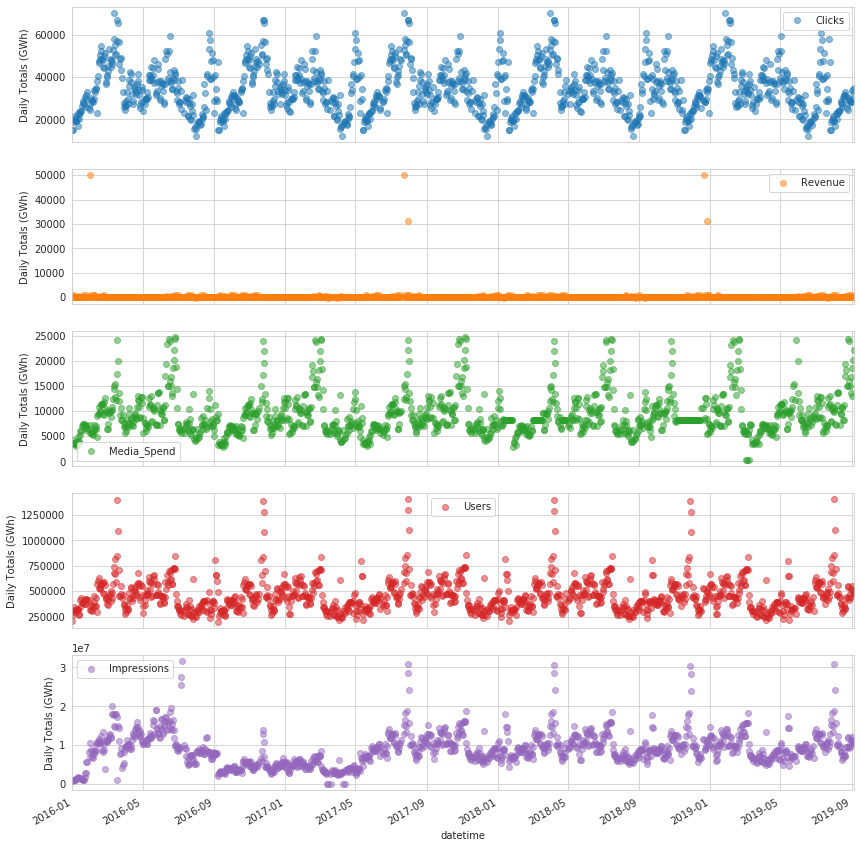

In [0]:
rcParams['figure.figsize'] = 14, 10
cols_plot = ['Clicks', 'Revenue', 'Media_Spend', 'Users', 'Impressions']
axes = ts[cols_plot].plot(marker='o', alpha=0.5, linestyle='None', figsize=(14, 16), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily Totals (GWh)')

**Observation:** Charts above shows some seasonality patterns for each year, apparently for summer and winter periods of years. Let zoom in and see what phenomenon we are observing. 

### Seasonality 
Let see the performance indicators in monthly basis. We can do this vizualization on weekly basis as well to observe which days of week the website gets more `clicks`, `traffic`, etc. 

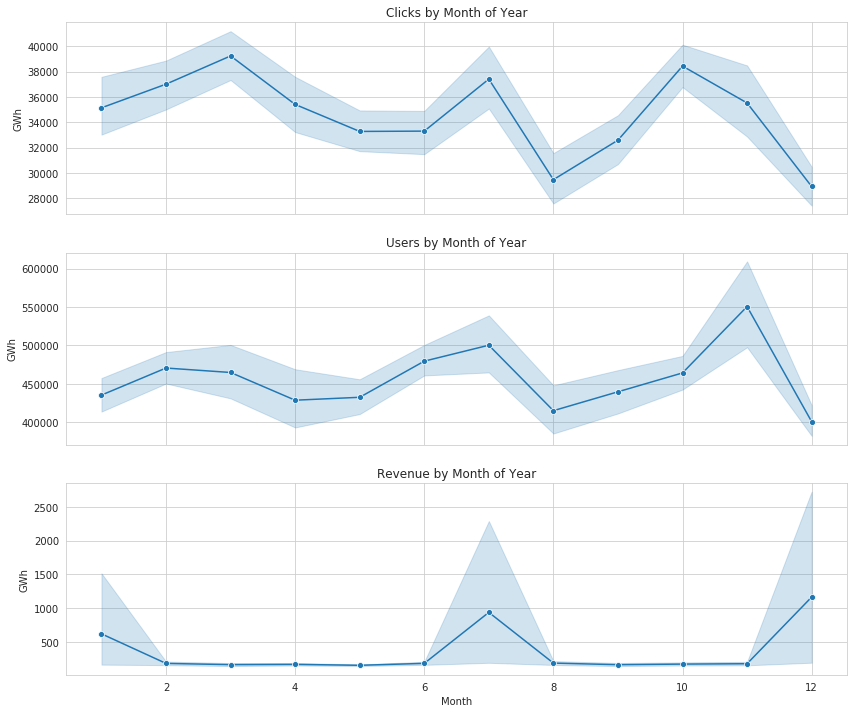

In [0]:
#@title
fig, axes = plt.subplots(3, 1, figsize=(14, 12), sharex=True)
for name, ax in zip(['Clicks', 'Users', 'Revenue', 'Media_Spend'], axes):
  sns.lineplot(data=ts, x='Month', y=name, marker = 'o', ax=ax)
  ax.set_ylabel('GWh')
  ax.set_title(name + ' by Month of Year')
# remove the automatic x-axis label from all but the bottom subplot
  if ax != axes[-1]:
      ax.set_xlabel('')

**Observation:** From top to bottom, we can see the increase in the number of `clicks` during June-July and August-November. Since the traffic and the clicks are positively correlated, and we also know that these features have linearity, similar trends are observable for the `User` traffic. Though from November traffic and clicks go down, we have an increase in `Revenue.`  

### Daily Click Distribution over Years
For better observation of changes in number of clicks, let's plot daily clicks for the last 3 years.

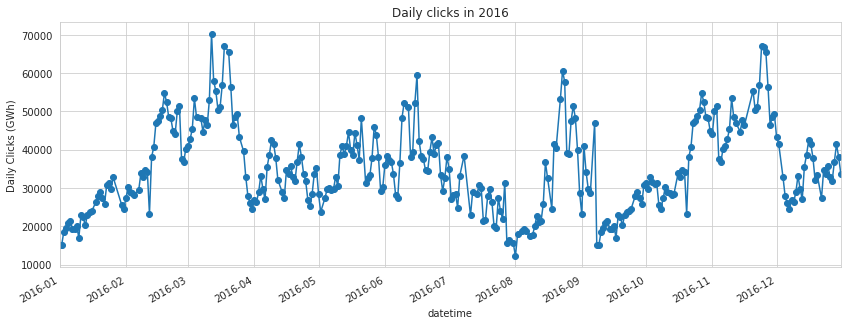

In [0]:
#@title

rcParams['figure.figsize'] = 14,5
ax = ts.loc['2016', 'Clicks'].plot(marker = 'o')
ax.set_ylabel('Daily Clicks (GWh)')
plt.title('Daily clicks in 2016')
plt.show()

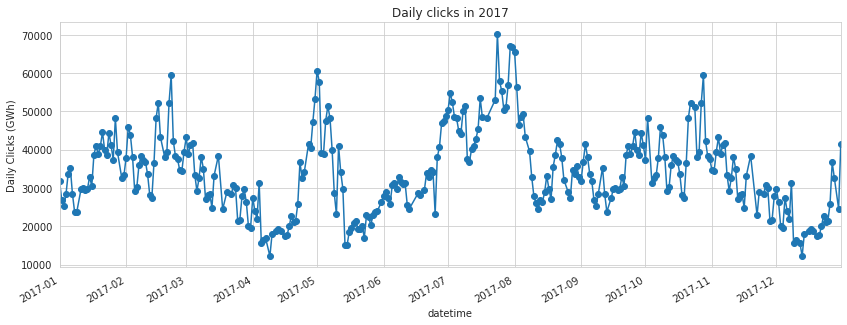

In [0]:
#@title

ax = ts.loc['2017', 'Clicks'].plot(marker = 'o')
ax.set_ylabel('Daily Clicks (GWh)')
plt.title('Daily clicks in 2017')
plt.show()

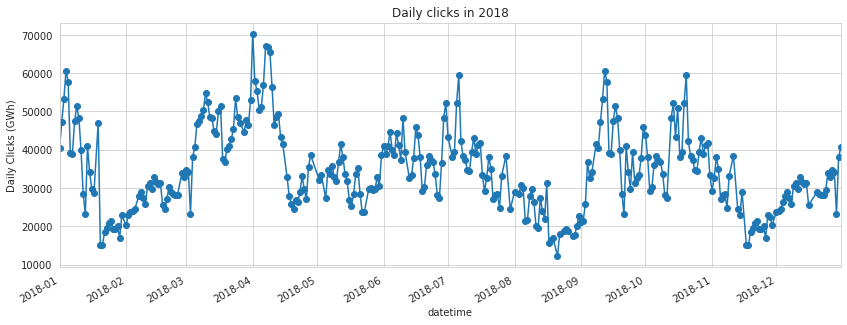

In [0]:
#@title
ax = ts.loc['2018', 'Clicks'].plot(marker = 'o')
ax.set_ylabel('Daily Clicks (GWh)')
plt.title('Daily clicks in 2018')
plt.show()

**Observation:** In contrast to 2016, we see a dicrese in the number of clicks in during November and December for the last two years.

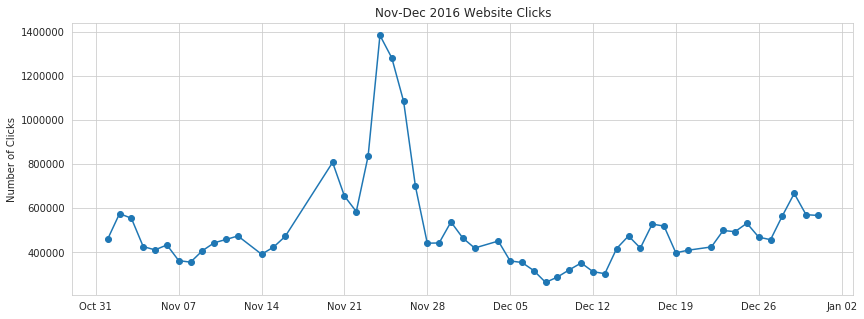

In [0]:
#@title

fig, ax = plt.subplots()
ax.plot(ts.loc['2016-11':'2016-12', 'Users'], marker='o', linestyle='-')
ax.set_ylabel('Number of Clicks')
ax.set_title('Nov-Dec 2016 Website Clicks')
# setting x-axis major ticks to weekly interval, on Mondays
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
# formatting x-tick labels as 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));

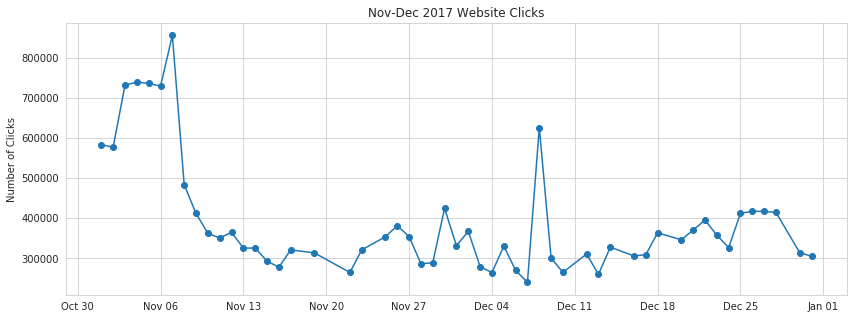

In [0]:
#@title
fig, ax = plt.subplots()
ax.plot(ts.loc['2017-11':'2017-12', 'Users'], marker='o', linestyle='-')
ax.set_ylabel('Number of Clicks')
ax.set_title('Nov-Dec 2017 Website Clicks')
# setting x-axis major ticks to weekly interval, on Mondays
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
# formatting x-tick labels as 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));

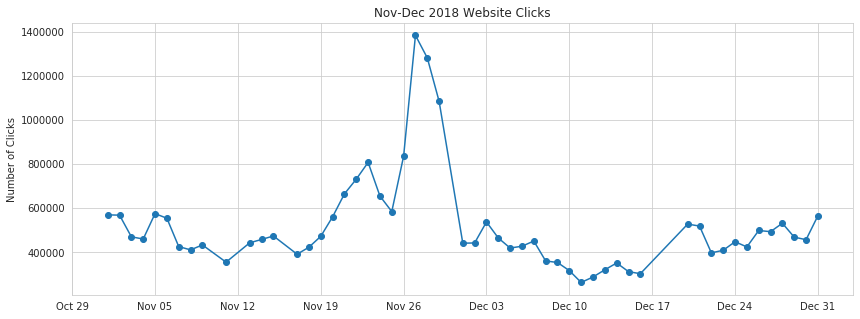

In [0]:
#@title
fig, ax = plt.subplots()
ax.plot(ts.loc['2018-11':'2018-12', 'Users'], marker='o', linestyle='-')
ax.set_ylabel('Number of Clicks')
ax.set_title('Nov-Dec 2018 Website Clicks')
# setting x-axis major ticks to weekly interval, on Mondays
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
# formatting x-tick labels as 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));

**Observation:** There is a dramatic increase in the number of clicks from Nov 25th to Nov 28th for the years 2016 and 2018. But it seems something happened in 2017 and we don't observe the same phenomenon. We don't have the same data for the year 2019 to compare and make sure that the pattern we are finding is repeating or not. 

# KPI
Dataset provides us with performance indicators. We can calculate KPIs and analyze the change in KPIs ove time, by product name, gender, states and etc.

I'll define few KPIs useful for e-commerce.

1. Click-through Rate (CTR)
2. Conversion Rate
3. Average Order Value (AOV)
4. Cost Per Acquisition (CPA)
5. Return on Investment (in this case Media Spend) (ROI) 

## KPI Calculation

 - CTR = Clicks/Impressions  -  is a useful way to determine the effectiveness of 
a given ad.

 - Conversion Rate = Conversios/Traffic - It’s one of your most important metrics and one that we should be keeping a close eye on.

 - AOV = Revenue/Orders (in our case Orders = Conversions) - helps to identify opportunities to upsell, cross-sell or promote special offers for products.

 - CPA = Media Spend/Customers  - unfortunaly, I couldn't find any variable which could represent the number of unique customers to calculate this metric. 

 - CPM = Media Spend/Impressions - cost per thousand impressions

- CPC = Media Spend/Clicks - cost per single click

- ROMI = (Revenue - Media Spend)/Media Spend  - return on marketing expenses. ROMI cannot be considered as regular ROI since marketing is not the same kind of investment.

In [0]:
# replacing negative Revenue with zero to avoid -inf

ts['CTR (%)'] = np.multiply(np.divide(ts['Clicks'], ts['Impressions']), 100)
ts['Con. Rate (%)'] = np.multiply(np.divide(ts['# Conversions'], ts['Users']), 100)
ts['AOV ($)'] = np.divide(ts['Revenue'], ts['# Conversions'])
ts['CPM ($)'] = np.divide(ts['Media_Spend'], ts['Impressions'])
ts['CPC ($)'] = np.divide(ts['Media_Spend'], ts['Clicks'])
ts['ROMI ($)'] = np.divide(np.subtract(ts['Revenue'], ts['Media_Spend']), ts['Media_Spend'])

ts_kpi = ts.drop(columns = ['DMA', 'ProductName', 'Device', 'Year', 'Month', 'Weekday Name'])
ts_kpi.head()

,Users,Impressions,Clicks,# Conversions,Revenue,Media_Spend,CTR (%),Con. Rate (%),AOV ($),CPM ($),CPC ($),ROMI ($)
datetime,,,,,,,,,,,,
2016-01-01,205989.21,1200916.0,15126,2,141.93,3456.190020,1.259539,0.000971,70.965000,0.002878,0.228493,-0.958935
2016-01-02,268739.66,885313.0,15254,4,686.95,4158.543690,1.723006,0.001488,171.737500,0.004697,0.272620,-0.834810
2016-01-03,296737.05,1138476.0,18666,5,428.60,3706.326005,1.639560,0.001685,85.720000,0.003256,0.198560,-0.884360
2016-01-04,342409.92,1135033.0,19688,7,144.03,3686.892393,1.734575,0.002044,20.575714,0.003248,0.187266,-0.960935
2016-01-05,319611.48,993545.0,20886,1,145.59,3644.233662,2.102170,0.000313,145.590000,0.003668,0.174482,-0.960049


In [0]:
ts_kpi.describe()

,Users,Impressions,Clicks,# Conversions,Revenue,Media_Spend,CTR (%),Con. Rate (%),AOV ($),CPM ($),CPC ($),ROMI ($)
count,1.227000e+03,1.227000e+03,1227.000000,1227.000000,1227.000000,1227.000000,1.227000e+03,1227.000000,1227.000000,1227.000000,1227.000000,1227.000000
mean,4.556509e+05,9.079438e+06,34709.190709,4.264059,352.455550,9373.450121,4.751307e+04,0.001029,97.373192,101.368643,0.277660,-0.955470
std,1.596389e+05,4.213711e+06,10970.057126,2.509435,2760.087399,4237.947880,8.240302e+05,0.000706,479.596103,1669.733719,0.109516,0.359536
min,1.959892e+05,2.000000e-01,12248.000000,1.000000,-404.610000,249.999412,6.223702e-02,0.000091,-404.610000,0.000016,0.006039,-1.077772
25%,3.444052e+05,6.360284e+06,27351.000000,2.000000,143.070000,6696.504534,2.955904e-01,0.000451,23.666667,0.000773,0.206792,-0.986622
50%,4.283648e+05,8.784841e+06,33380.000000,4.000000,144.830000,8151.846708,3.757845e-01,0.000886,46.136667,0.000965,0.251265,-0.982176
75%,5.421567e+05,1.137573e+07,41148.000000,7.000000,146.375000,10874.399233,5.470064e-01,0.001466,75.030000,0.001434,0.309132,-0.976449
max,1.404163e+06,3.153001e+07,70308.000000,9.000000,50020.710000,24713.949914,1.923300e+07,0.004082,10004.142000,31602.564544,0.896210,7.806576


# Conclusion
Avg. CTR is 4.75% which is very good considering that the good campaing should have CTR above 2%.
The average eCommerce conversion in the US is at 2.63%. Our average is incomparably low.

**Problem:**
High CTR and low Con. Rate indicates that either the ad bids on very general keywords or there are some technical issues (irritating landing page, not considering audience's needs). 

**Solution:**
Better UX/UI and Search Engine Optimization.



# Further Analysis

 - Grouping states by geographic division to see if any specific patterns in the e-commerce behavior of visitors.

 - Analyzing campaign results on a weekday basis. 
 - Seasonal Adjustment - seasonal stationarity by removing a seasonal component.
 - CTR per Product/State
 - The popularity of Product over Years
 - HHI by Audience Category/Product


In [ ]:
!jupyter nbconvert --to pdf xaxis.ipynb